# Cuaderno de Regresión

Con este cuaderno se estudian métodos de regresión empleando diferentes técnicas para calcular la regresión. También se emplean modelos pre-existentes en la librería scikit-learn para analizar el dataset: **"ice_cream_revenue" (IceCreamData.csv)**

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplean modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma:
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Modelo lineal
Se trabaja con datos artificialmente generados (sintéticos ~ usando matemática). Creamos datos basados en la ecuación de una línea recta, luego agregamos ruido y graficamos los datos para tener una visualización de su comportamiento.

El ruido que se agrega es de naturaleza Gaussiana, con media cero y desviación estándar de 1. Se crean 100 datos para efectos de una visualización adecuada.

datos_x = [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.1

Text(0.5, 1.0, 'Dataset generado')

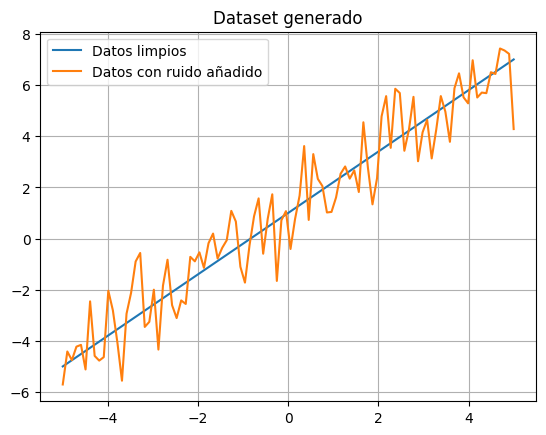

In [ ]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del -5 al 5
print("datos_x =", datos_x)

pendiente = 1.2
intersepto = 1

datos_y = datos_x * pendiente + intersepto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,1,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

### 1.2 Creación del modelo
Posteriormente se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros $b$ (a encontrar). La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en: `numpy.linalg.pinv()`


In [ ]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parámetros son: ", parametros_b)

Los parámetros son:  [1.16097028 1.05569084]


Text(0.5, 1.0, 'Modelo de regresión lineal')

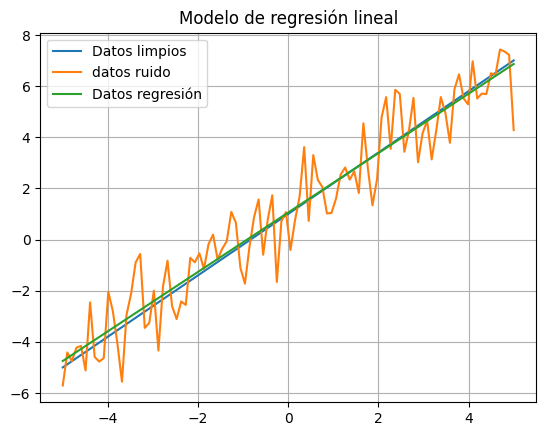

In [ ]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue (IceCreamData.csv)
### 2.1 Análisis exploratorio de los datos (EDA)

Se emplea el dataset **"ice-cream-revenue"** que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crean modelos de regresión. El dataset se preprocesa para poder tener datos de evaluación del modelo.


In [ ]:
import pandas as pd
import sklearn
import seaborn as sns

In [ ]:
df_helados = pd.read_csv("IceCreamData.csv")
df_helados.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df_helados.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [ ]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


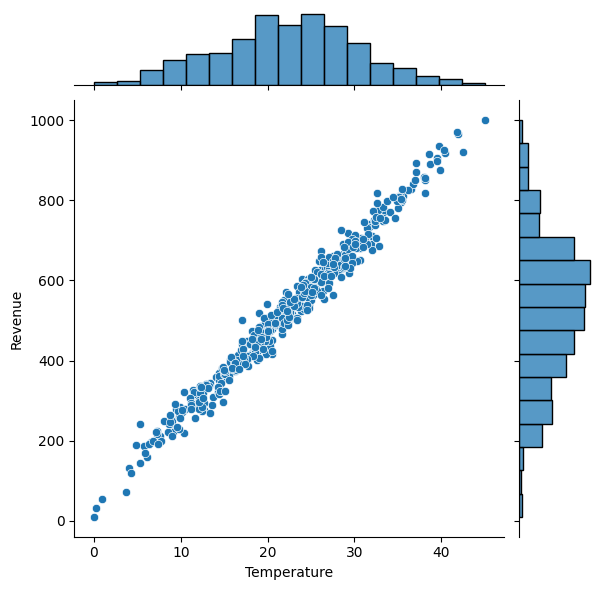

In [ ]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [ ]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersepto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [21.44178665], el intersepto (A) es 43.804533443159755


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

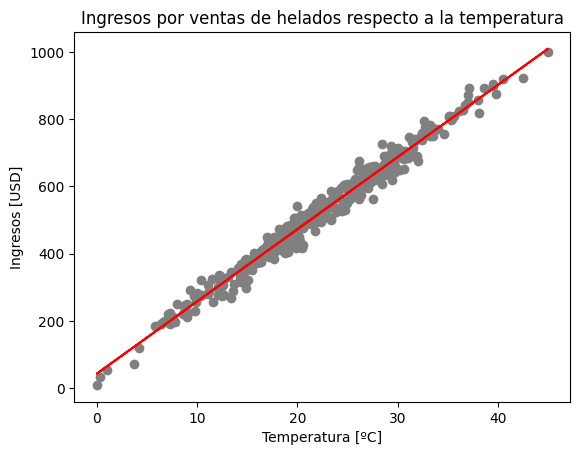

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

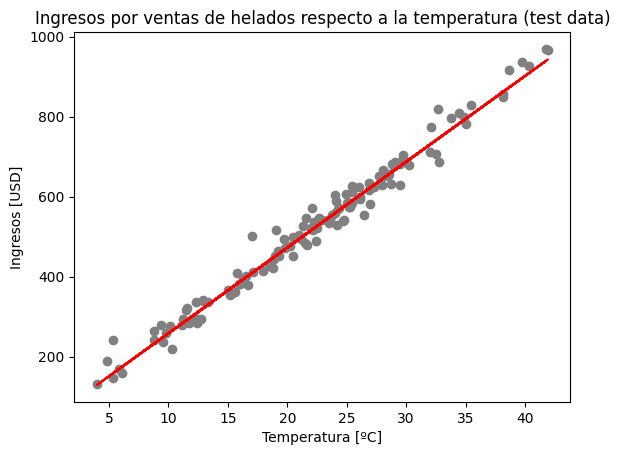

In [ ]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')


### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [ ]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 691.4581134302744
Root Mean Squared Error: 26.29559114053674


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error.


## Tarea en clase-casa:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

# TAREA: hacerlo por sus propios medio

def calculate_mean_squared_error(y_real, y_pred):
  # y_real and y_pred are arrays
  mse = ( (y_real) - (y_pred) ) ^ 2
  # mse = ( (y_real) - (y_pred) ) ^ 2
  # Falta tener en cuenta el promedio (suma/total)
  return mse


def get_mean_absolute_error(y_real, y_pred):
  # y_real and y_pred are arrays
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  # Falta tener en cuenta el promedio (suma/total)
  return mae


Definir una función que calcule r2_score.

Graficar el histograma para ver la distribución de los errores
```



In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 19.598950788558813


### R cuadrado
Es una medida estadística que indica qué tan cerca (cuán cerca) estan los datos de ajustarse a una línea recta. Se conoce también como: **"coeficiente de determinación".**

In [ ]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9797493144800669
